# Part I - (Prosper Loan Data Exploration)
## by (Hanan Othman)

## Introduction

This is a dataset of Proser Loans which is contains information on peer to peer loans facilitated by credit company Prosper.It has 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset 
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# show the shape of the dataset 
df.shape

(113937, 81)

In [5]:
# get the overview of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
# check the duplicated
sum(df.duplicated())

0

In [8]:
# The missing value 
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

**Observation :** as Prosper use their own Prosper Rating since 2009, we have a lot of missing values in some columns, such as TotalProsperLoans , TotalProsperPaymentsBilled ,OnTimeProsperPayments ,ProsperPaymentsLessThanOneMonthLate ,ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed , ProsperPrincipalOutstanding , ScorexChangeAtTimeOfListing , LoanCurrentDaysDelinquent ,LoanFirstDefaultedCycleNumber

### What is the structure of your dataset?

>The dataset has 113,937 data  with 81 features.There are 61 numerical vaule, 17 object type and 3 boolean type.


>The columns names are (ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate,LenderYield, EstimatedEffectiveYield, EstimatedLoss,EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha),ProsperScore, ListingCategory (numeric), BorrowerState,Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper,FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines,
TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries,CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years,PublicRecordsLast10Years, PublicRecordsLast12Months,RevolvingCreditBalance, BankcardUtilization,AvailableBankcardCredit, TotalTrades,
TradesNeverDelinquent (percentage), TradesOpenedLast6Months,
DebtToIncomeRatio, IncomeRange, IncomeVerifiable,
StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled,OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate , ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding , ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey,MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount and Investors).


### What is/are the main feature(s) of interest in your dataset?

>Trying to figure out what features can be used to predict default on credit. And what are the major factors that connected with prosper credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Borrower Monthly Payment, Borrower Occupation, Borrower State, Borrower Employment Status , Borrower APR, Prosper Score, Loan Amount .

## Univariate Exploration

**1- Loan Status**

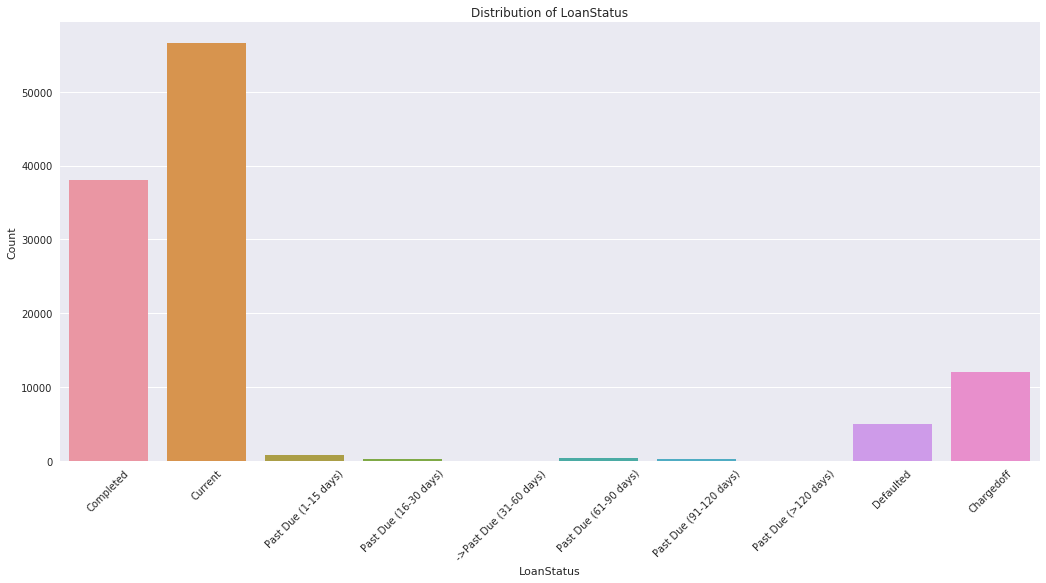

In [3]:
classes=['Completed','Current','Past Due (1-15 days)','Past Due (16-30 days)','->Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Chargedoff']
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.countplot(data = df, x = 'LoanStatus',order=classes);
plt.title('Distribution of LoanStatus')
plt.xlabel('LoanStatus')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** Most of the loans in the data set are actually current loans.
Past due loans are split in several groups based on the length of payment delay.
Other big part is completed loans, defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount.

**2- Prosper Rating**

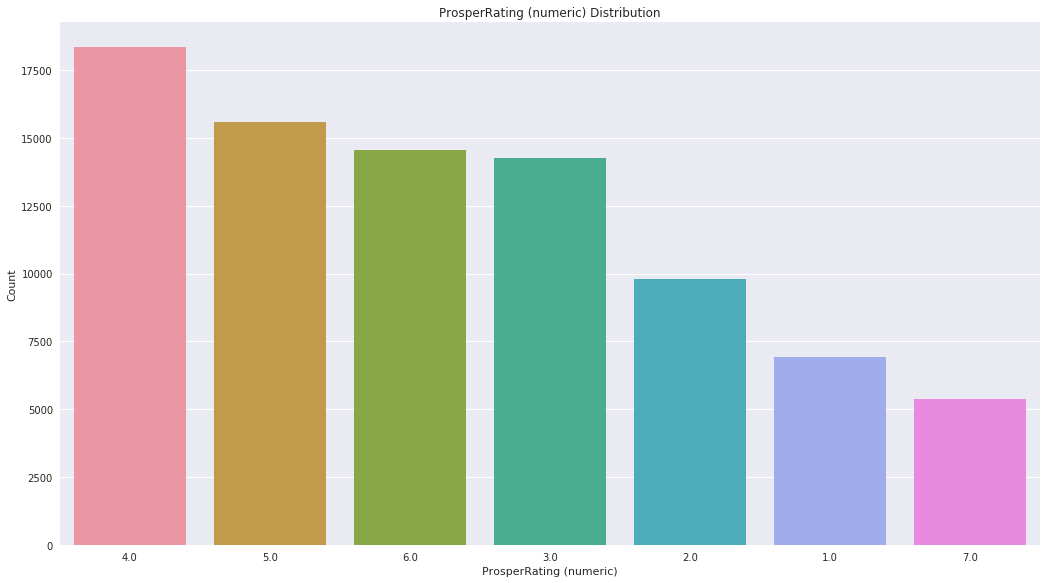

In [4]:
order = df['ProsperRating (numeric)'].value_counts().index
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.countplot(data = df , x = 'ProsperRating (numeric)' , order = order);
plt.title('ProsperRating (numeric) Distribution')
plt.xlabel('ProsperRating (numeric)')
plt.ylabel('Count')
plt.tight_layout();
plt.show()

**Observation :**
majority of borrower has Prosper Rating 4 ,5 , 6 and 3 

**3- Employment Status**

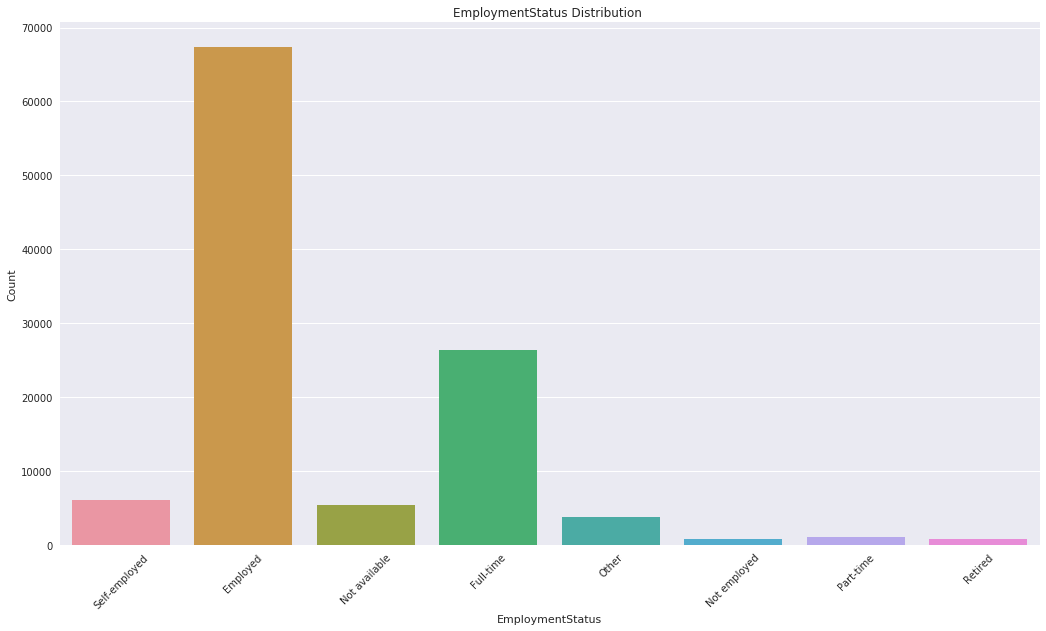

In [5]:
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.countplot(data = df, x = 'EmploymentStatus');
plt.title('EmploymentStatus Distribution ');
plt.xlabel('EmploymentStatus')
plt.ylabel('Count')
plt.tight_layout();
plt.xticks(rotation = 45);

**Observation** The majority of borrowers are employed and all other categories as small part of borrowers.
In small Group full time has highest, after that self empolyed are there and so on.

**4- Occupation Type**

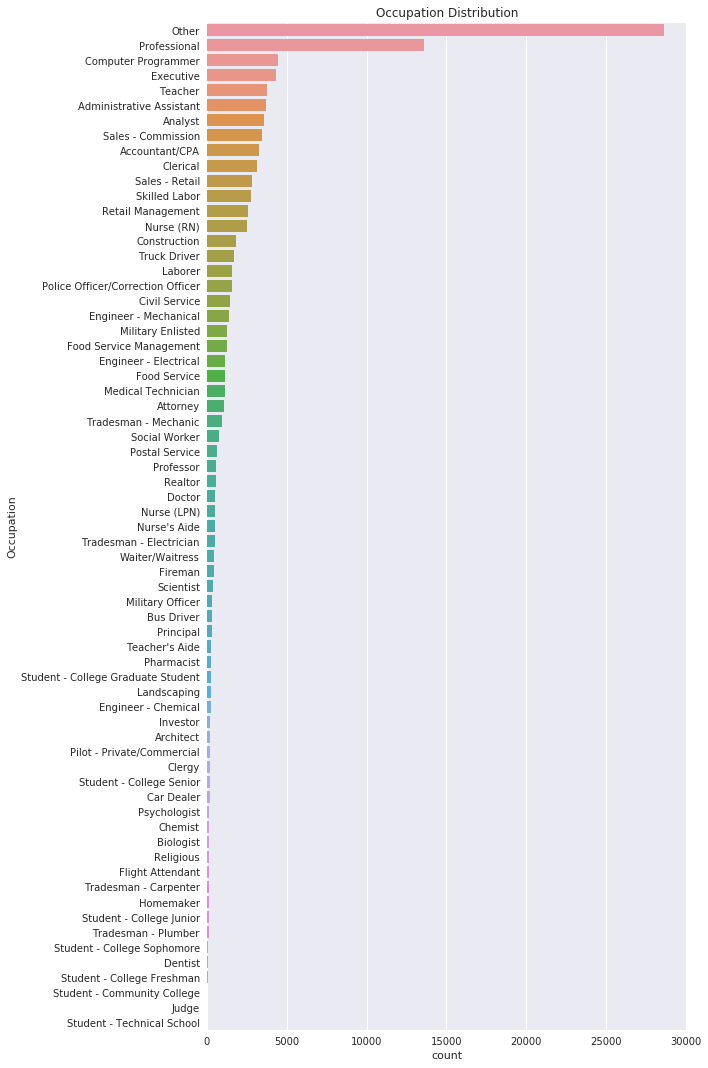

In [6]:
order = df['Occupation'].value_counts().index
sb.set(rc = {'figure.figsize':(10,15)})
sb.countplot(data = df , y = 'Occupation' , order = order);
plt.title('Occupation Distribution')
plt.tight_layout();
plt.show()

**Observation:** the higest category of borrower who take loans are Others , and then professionals

**5- Borrower Rate**

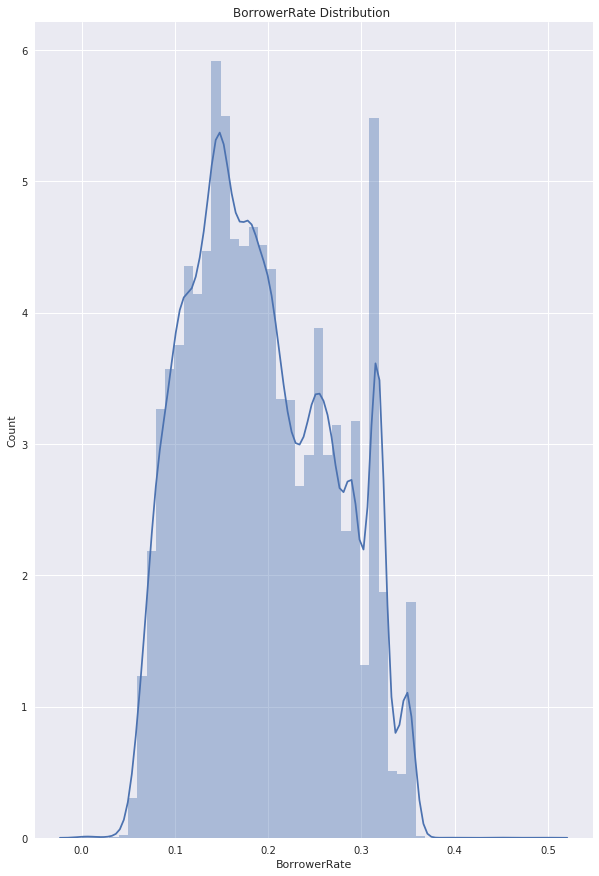

In [7]:
sb.distplot(df['BorrowerRate']);
plt.title('BorrowerRate Distribution ')
plt.xlabel('BorrowerRate')
plt.ylabel('Count')
plt.show()

In [8]:
df['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

**Observation:** Most of the people has borrower rate between 0.1 to 0.2. The mean is 0.18 

**6- Is Borrower Home Owner :**

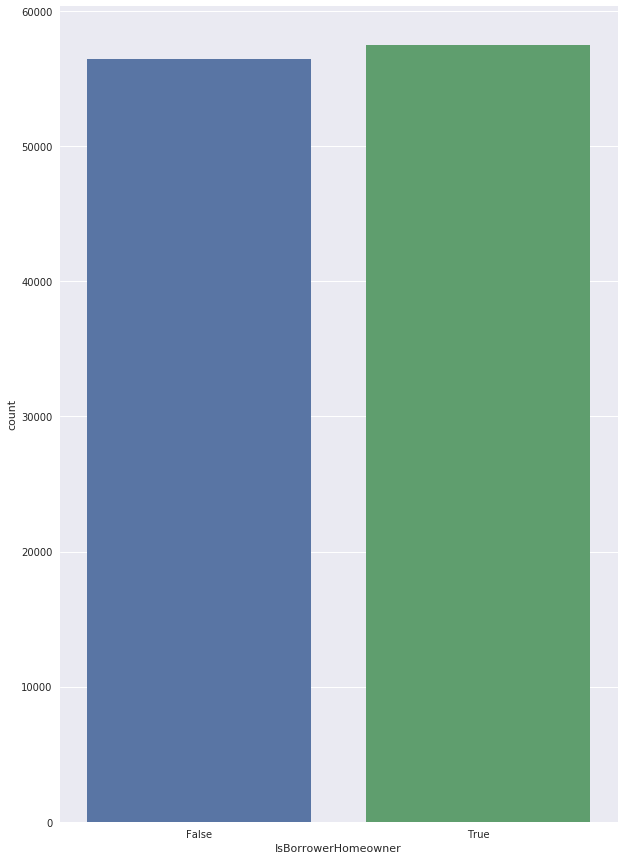

In [9]:
sb.countplot(data = df , x = 'IsBorrowerHomeowner' );

Text(0.5,1,'Is Borrower Home owner Distribution ')

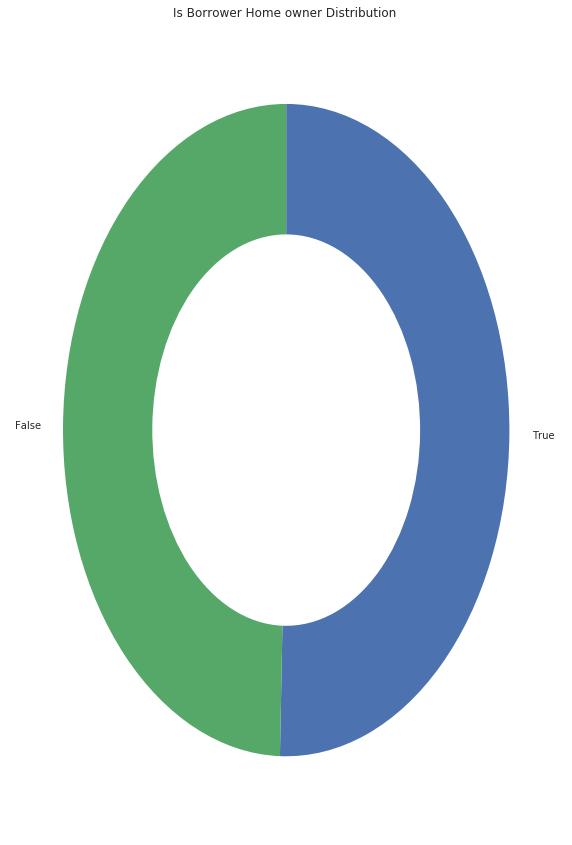

In [10]:
counts = df['IsBorrowerHomeowner'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Is Borrower Home owner Distribution ')

**Observation :** 50% od borrowers have their own home and 50% don't have their own home .

**7- Loan Original Amount**

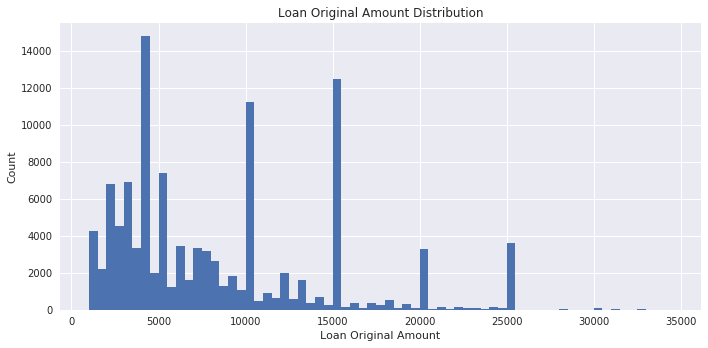

In [11]:
plt.figure(figsize = [10,5])
bins = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max(), 500)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins);
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.tight_layout();

**Observation :** amount that borrowed many times are 4500 , 10500 and 15000 

**8- Borrower State**

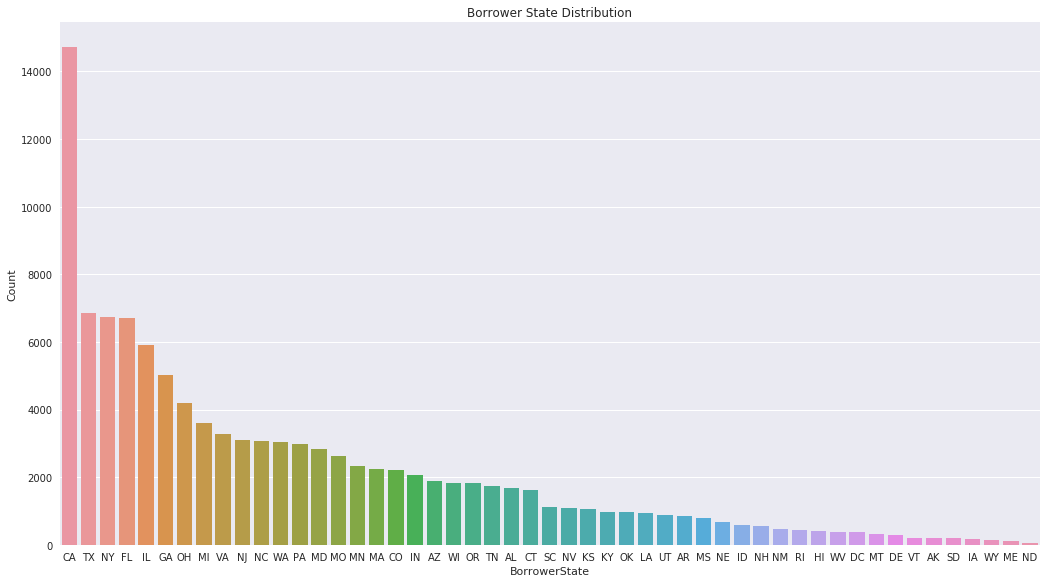

In [12]:
order = df['BorrowerState'].value_counts().index
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.countplot(data = df, x = 'BorrowerState',order=order);
plt.title('Borrower State Distribution')
plt.xlabel('BorrowerState')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Observation :** the highest borrowers quantity is from CA (California )
and in TX , NY , FL (Texas , New York , Florida ) has almost same no. of borrowers .

**9-Stated Monthly Income**

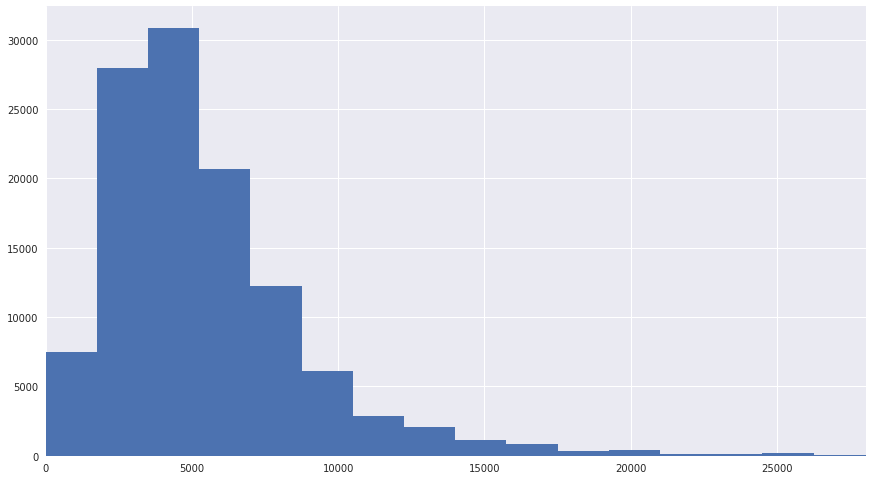

In [13]:
income_std = df['StatedMonthlyIncome'].std()
income_mean = df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
plt.hist(data=df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);

**Observation :** With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All the graphs that are plotted have a normal distributed .In the case of monthly stated income is very awkward: with a lot of outliers and very large range but still it was right skew. Also there is Borrower state that have  a great difference between the 1st highest state(california ) and 2nd highest state(Texas) this transformation is not  needed in this investigating on the datset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In case of original loan amount (loan original amount) we found that it is Multimodel . A multimodal distribution is a probability distribution with more than one peak, or “mode.”

**Bivariate Exploration**

In [14]:
df['LoanOriginationDate']= pd.to_datetime(df['LoanOriginationDate'])


In [15]:
# Extract year, month, day, hour, and minute. Assign all these date component to new column.
df['Originationyear'] = df['LoanOriginationDate'].dt.year
df['Originationmonth'] = df['LoanOriginationDate'].dt.month
df['Originationday'] = df['LoanOriginationDate'].dt.day

df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Originationyear,Originationmonth,Originationday
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,0.0,0.0,1.0,0,0,0.0,258,2007,9,12
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.0,0.0,1.0,0,0,0.0,1,2014,3,3


**1- Loan Origination Year vs Loan Origination Amount**

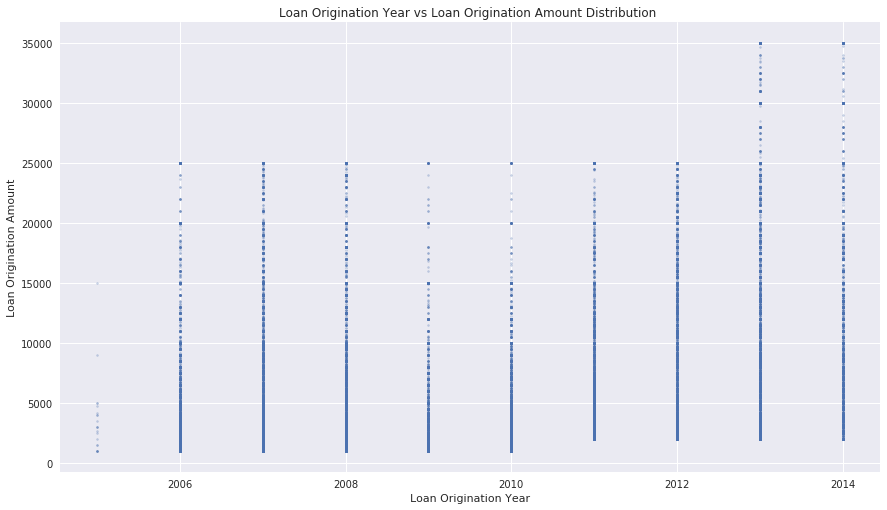

In [16]:
plt.scatter(data = df , x= 'Originationyear' , y = 'LoanOriginalAmount', alpha=0.3 , s=4);
plt.title('Loan Origination Year vs Loan Origination Amount Distribution ')
plt.xlabel('Loan Origination Year')
plt.ylabel('Loan Origination Amount')
plt.show()

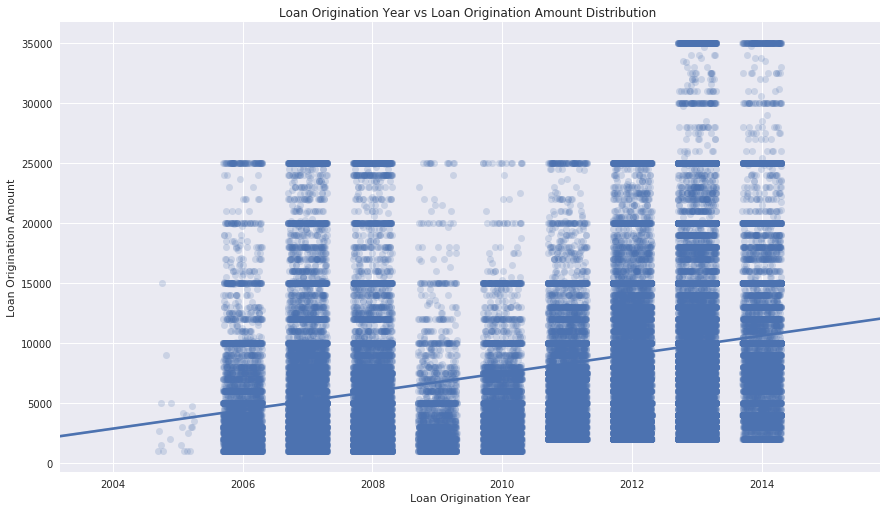

In [17]:
sb.regplot(data = df , x= 'Originationyear' , y = 'LoanOriginalAmount',x_jitter =0.3 , scatter_kws={'alpha': 1/5});
plt.title('Loan Origination Year vs Loan Origination Amount Distribution ')
plt.xlabel('Loan Origination Year')
plt.ylabel('Loan Origination Amount')
plt.show()

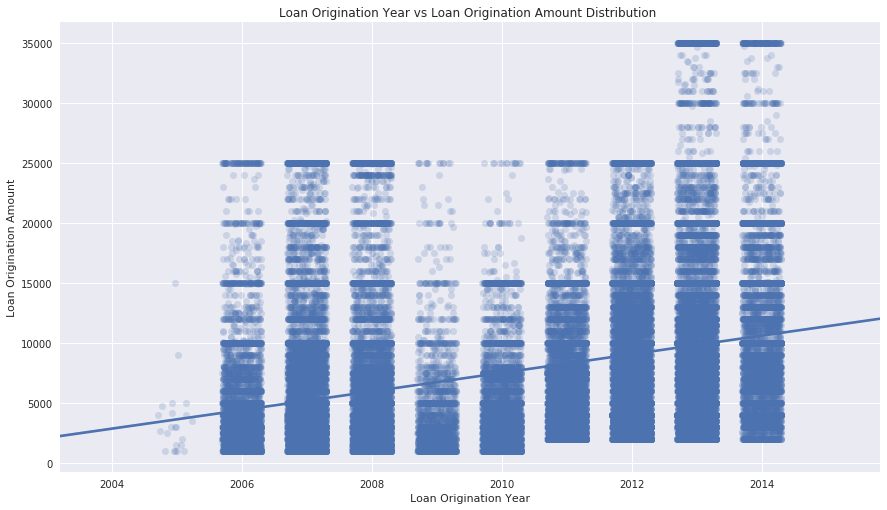

In [18]:
sb.regplot(data = df , x= 'Originationyear' , y = 'LoanOriginalAmount' 
            ,x_jitter = 0.3 , scatter_kws = {'alpha' : 1/5});
plt.title('Loan Origination Year vs Loan Origination Amount Distribution ')
plt.xlabel('Loan Origination Year')
plt.ylabel('Loan Origination Amount')
plt.show()

**Observation :** at earliers years borrowed amount is used to be less comparetively.
as shown by the regplot also , the line is tending to increase with the year

**2- Borrower Rate vs Loan Origination Year**

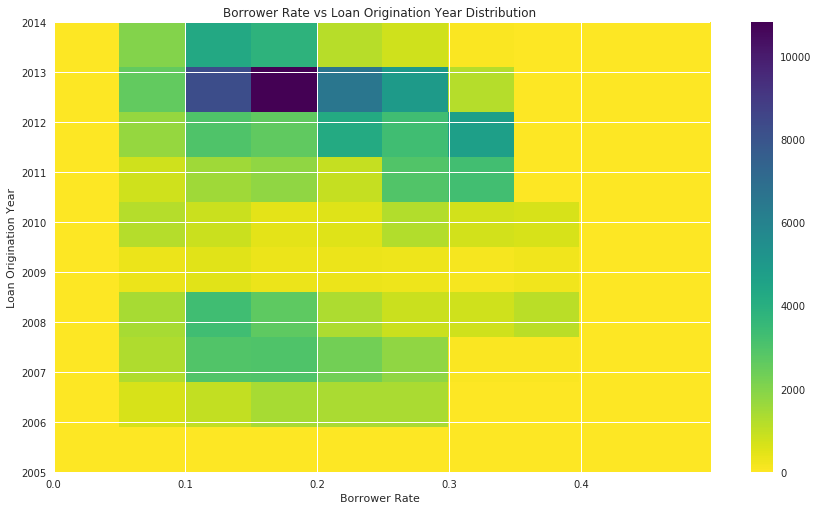

In [19]:
plt.hist2d(data = df , y= 'Originationyear' , x = 'BorrowerRate' , cmap = 'viridis_r'  );
plt.colorbar() 
plt.title('Borrower Rate vs Loan Origination Year Distribution ')
plt.xlabel('Borrower Rate ')
plt.ylabel('Loan Origination Year')
plt.show()

**Observation :** borrower rate tends to increasing with year , and then deceresing .

**3- Credit Grade vs Monthly Loan Paymenti**

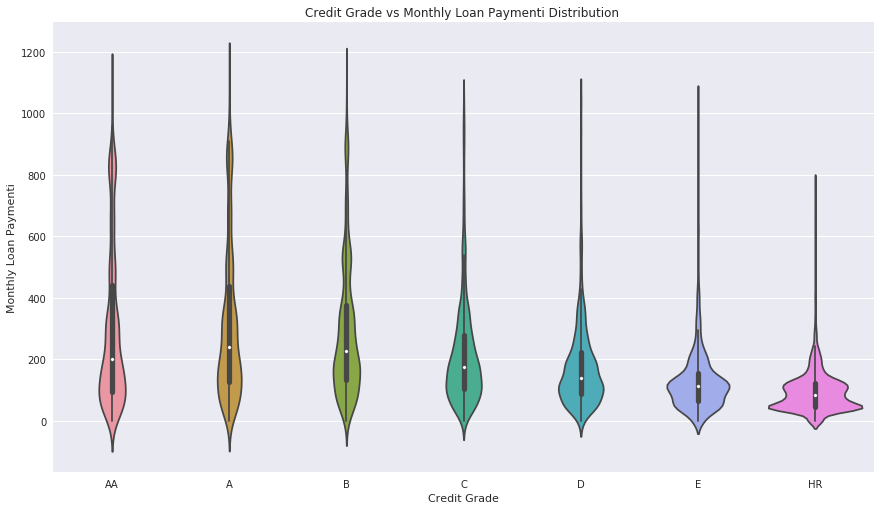

In [20]:
classes = ['AA','A','B','C','D','E','HR']
sb.violinplot(data = df, x = 'CreditGrade', y = 'MonthlyLoanPayment', order=classes);
plt.title('Credit Grade vs Monthly Loan Paymenti Distribution ')
plt.xlabel('Credit Grade')
plt.ylabel('Monthly Loan Paymenti')
plt.show()


**Observation :** the highest median of monthly paid income is of A , followed by AA and B .

**4- Loan Origination Year vs Borrower Rate**

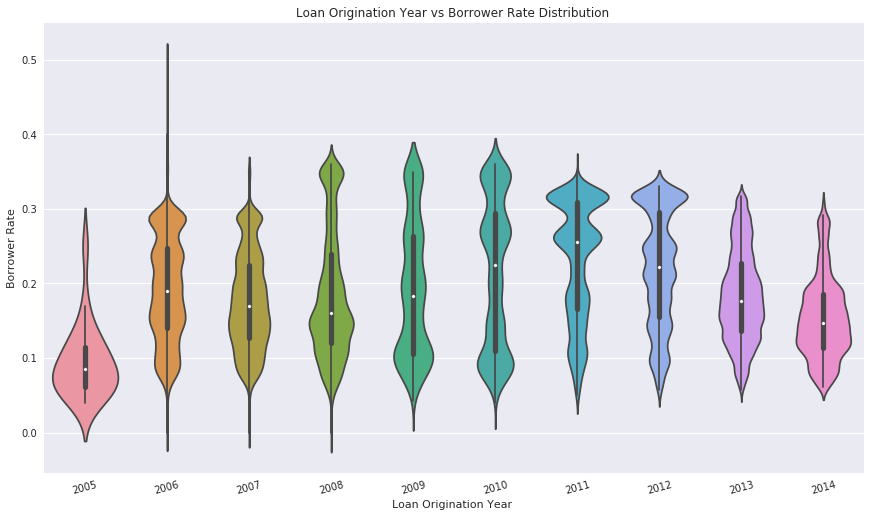

In [22]:
sb.violinplot(data = df, x = 'Originationyear', y = 'BorrowerRate');
plt.xticks(rotation = 15);
plt.title('Loan Origination Year vs Borrower Rate Distribution ')
plt.xlabel('Loan Origination Year ')
plt.ylabel('Borrower Rate')
plt.show()

**Observation :** the highest borower rate is on 2008 , 2009 , 2009 .

**5- Employment status vs Borrower APR**

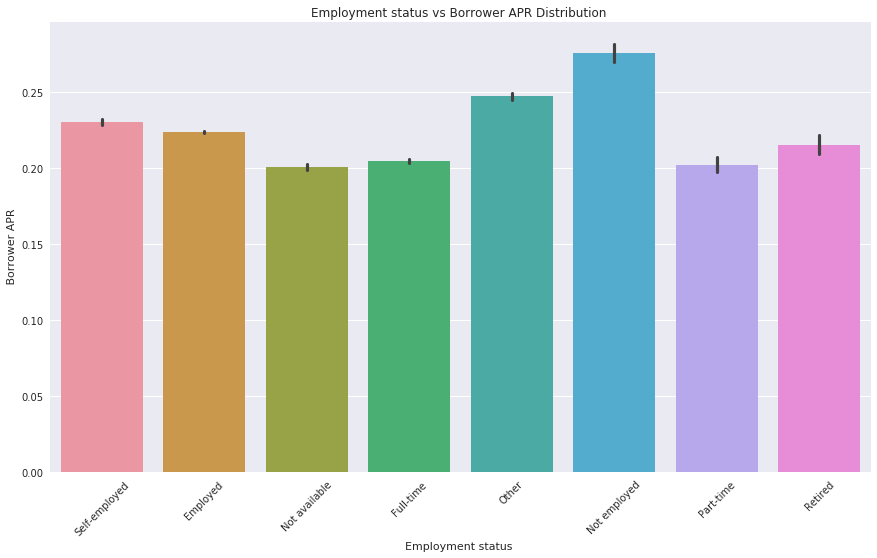

In [23]:
sb.barplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR' );
plt.title('Employment status vs Borrower APR Distribution ')
plt.xlabel('Employment status ')
plt.ylabel(' Borrower APR')
plt.xticks(rotation=45)
plt.show()

**Observation :** the highest borrower APR is of Non Employed borrowers
it is followed by Others , Self-Employed and Employed.

**6- Income Range vs Borrower APR**

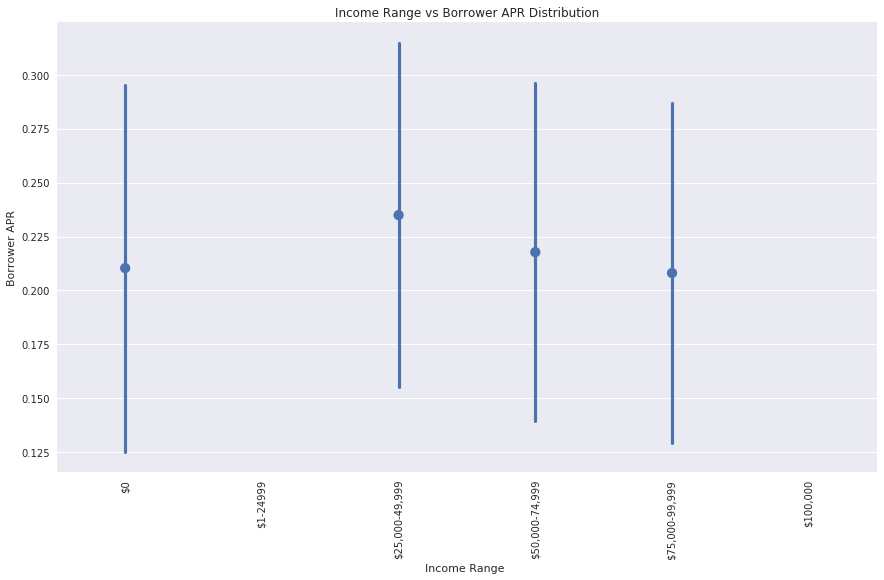

In [24]:
sedan_classes = ['$0','$1-24999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000']
sb.pointplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR', linestyles = '' , ci = 'sd',order=sedan_classes);
plt.title('Income Range vs Borrower APR Distribution')
plt.xlabel('Income Range ')
plt.ylabel('Borrower APR')
plt.xticks(rotation=90)
plt.show()


**Observation :** the highest borrower APR are again for Non -Employed and it is followed by borrowers with income range ($1-24,999).

The lowest borrower rate is of income range ($100,000)

**7- Employment Status vs Borrower Rate**

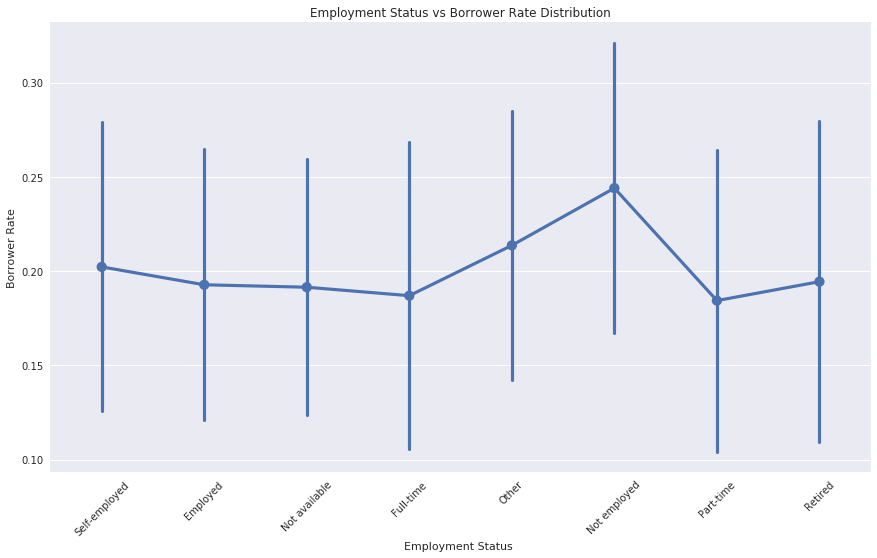

In [25]:
sb.pointplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate' , ci = 'sd');
plt.title('Employment Status vs Borrower Rate Distribution')
plt.xlabel('Employment Status ')
plt.ylabel('Borrower Rate')
plt.xticks(rotation=45)
plt.show()
 

**Observation :** heighest borrower rate is of borrower with Non - Employed Status

**8- Borrower Rate vs Loan Status**

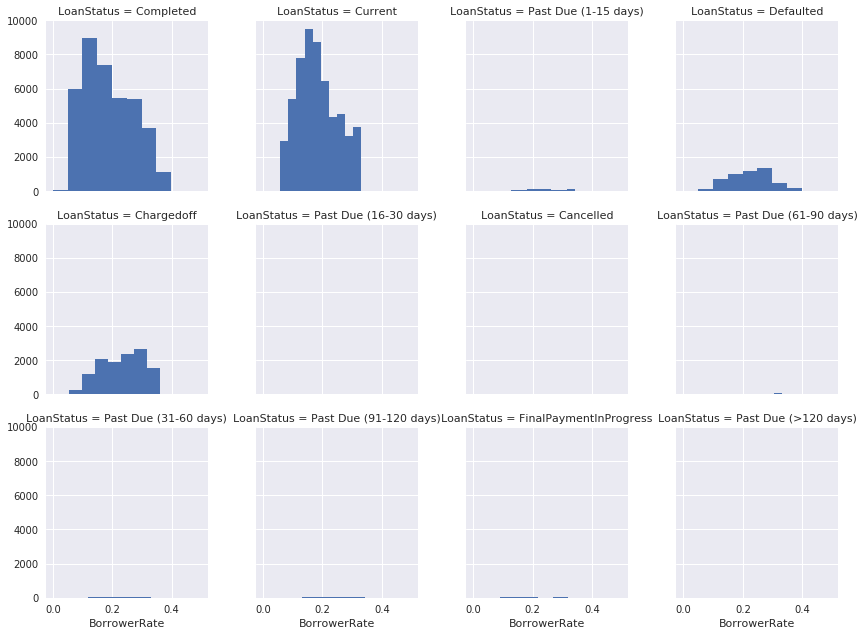

In [26]:
bins = np.arange(0.0 , 0.42 , 0.03)
g = sb.FacetGrid(data = df , col = 'LoanStatus' , col_wrap =4)
g.map(plt.hist , 'BorrowerRate');

**Observation :** highest borrower rate is for Currenttly Acive Loans and follwed by Completed Loans.

**9- Employment Status vs Prosper Score**

In [27]:
ct_counts= df.groupby([ 'EmploymentStatus' ,'ProsperScore' ]).size()
ct_counts

EmploymentStatus  ProsperScore
Employed          1.0               533
                  2.0              4353
                  3.0              5947
                  4.0             10181
                  5.0              7807
                  6.0             10130
                  7.0              8806
                  8.0              9710
                  9.0              4704
                  10.0             3774
                  11.0             1365
Full-time         1.0               199
                  2.0               245
                  3.0               331
                  4.0               477
                  5.0               711
                  6.0               883
                  7.0               922
                  8.0              1575
                  9.0              1811
                  10.0              759
                  11.0               14
Not employed      1.0                 4
                  2.0                52
         

In [28]:
ct_counts = ct_counts.reset_index(name= 'count')
ct_counts 

,EmploymentStatus,ProsperScore,count
0,Employed,1.0,533
1,Employed,2.0,4353
2,Employed,3.0,5947
3,Employed,4.0,10181
4,Employed,5.0,7807
5,Employed,6.0,10130
6,Employed,7.0,8806
7,Employed,8.0,9710
8,Employed,9.0,4704
9,Employed,10.0,3774


In [29]:
# PIVOT : to rearrange data , so that i have vehicle class on rows , transmission type on columns and values in the cell
ct_counts = ct_counts.pivot(index = 'EmploymentStatus' , columns = 'ProsperScore' , values = 'count')
ct_counts

ProsperScore,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
EmploymentStatus,,,,,,,,,,,
Employed,533.0,4353.0,5947.0,10181.0,7807.0,10130.0,8806.0,9710.0,4704.0,3774.0,1365.0
Full-time,199.0,245.0,331.0,477.0,711.0,883.0,922.0,1575.0,1811.0,759.0,14.0
Not employed,4.0,52.0,76.0,106.0,104.0,118.0,88.0,71.0,27.0,3.0,NaN
Other,37.0,374.0,510.0,759.0,517.0,574.0,408.0,374.0,126.0,93.0,34.0
Part-time,6.0,9.0,9.0,19.0,32.0,24.0,33.0,51.0,59.0,14.0,NaN
Retired,13.0,27.0,19.0,32.0,40.0,52.0,53.0,49.0,58.0,24.0,NaN
Self-employed,200.0,706.0,750.0,1021.0,602.0,497.0,287.0,223.0,126.0,83.0,43.0


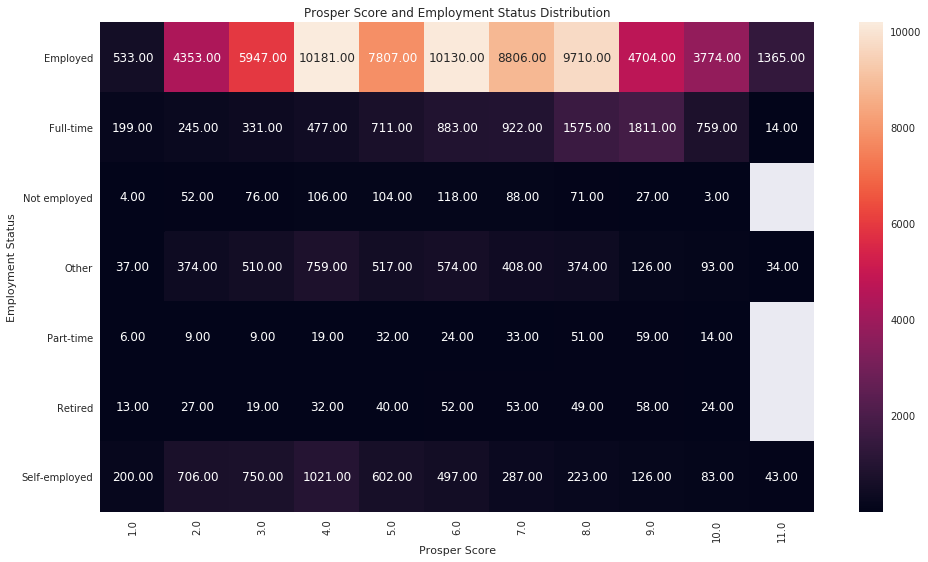

In [30]:
plt.figure(figsize = [16,9])
sb.heatmap(ct_counts , annot =True , fmt = '.2f');
plt.title('Prosper Score and Employment Status Distribution')
plt.xlabel('Prosper Score')
plt.ylabel('Employment Status')
plt.xticks(rotation=90)
plt.show()


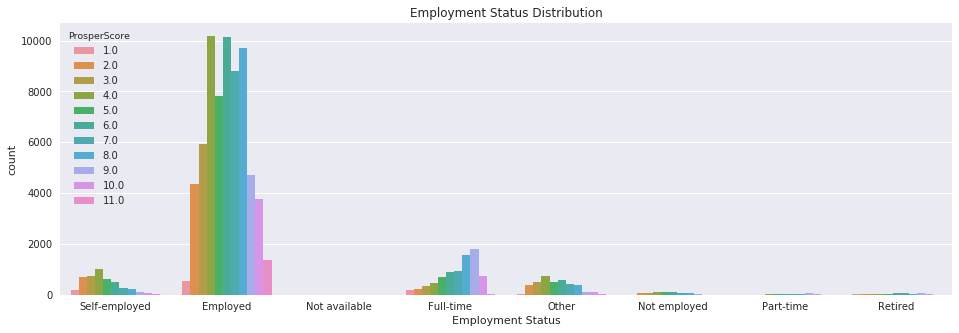

In [31]:
plt.figure(figsize = [16,5])
ax = sb.countplot(data = df, x = 'EmploymentStatus' , hue = 'ProsperScore');
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.show()
# ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperSco

**Observation :**  Prosper rating is highest fro Employed Borrowers . the difference in the no. of Prosper Rated Borrowers in different Employment status is very large .

**10 - LoanStatus vs Is Borrower Home owner**

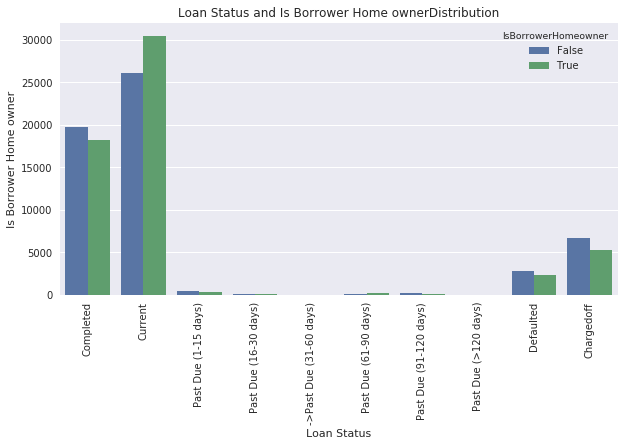

In [32]:
classes=['Completed','Current','Past Due (1-15 days)','Past Due (16-30 days)','->Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Chargedoff']
plt.figure(figsize = [10,5])
ax = sb.countplot(data = df, x = 'LoanStatus' , hue = 'IsBorrowerHomeowner', order=classes);
plt.title('Loan Status and Is Borrower Home ownerDistribution')
plt.xlabel('Loan Status' )
plt.ylabel('Is Borrower Home owner')
plt.xticks(rotation=90)
plt.show()
 

**Observation :** Currently Active Loan borrowers are the highest with Owed Home .

**11-numerical Catagory Variables**

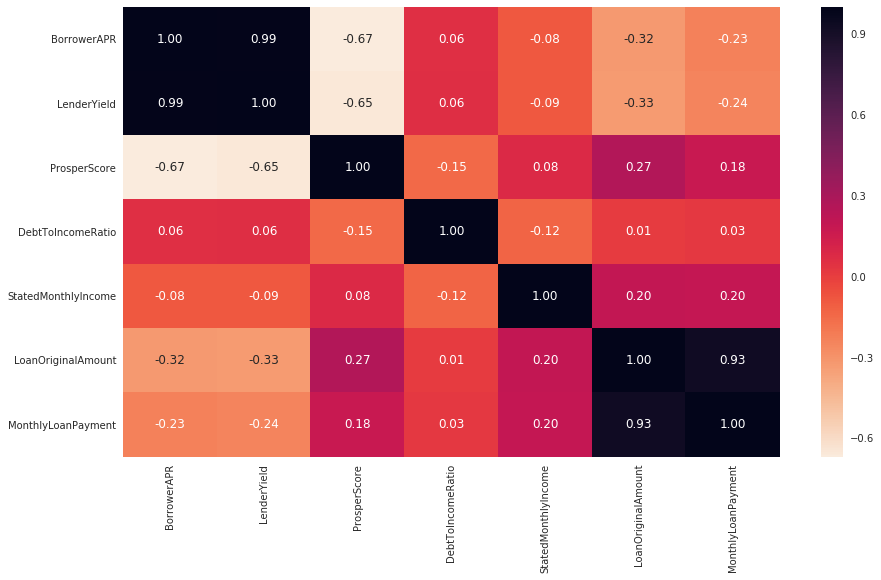

In [33]:
df_stats = ['BorrowerAPR', 'LenderYield', 'ProsperScore', 'DebtToIncomeRatio',
               'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
sb.heatmap(df[df_stats].corr() , cmap = 'rocket_r' , annot =True , fmt = '.2f');


**Observation:** LoanOriginalAmount and BorrowerAPR is having negative relationship, BorrowerAPR and LenderYield is having strong positive relationship, ProsperScore and BorrowerAPR is having Negative relationship, LoanOriginalAmount and MonthlyLoanPayment is having strong positive relationship

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Loan Amount : loan amounts keep increasing with the year . Borrower Rate and Borrower APR keep up increasing and decreasing .In Loan status vs Loan amount defaulted credits tend to be smaller than completed credits onces. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'.  Borrower rate is highest for 2008 , 2009 , 2010 Employed Browwers have highest Prosper Rting .

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Prosper rating , Is borrower owned home and Ocupation intresting.

## Multivariate Exploration

In [34]:
# lets create a sample for further implementation 
np.random.seed(2018)
sample=np.random.choice(df.shape[0] , 50000 , replace=False)
df_subset = df.loc[sample]

**1- Employment Status and Loan Original Amount vs Loan Status :**

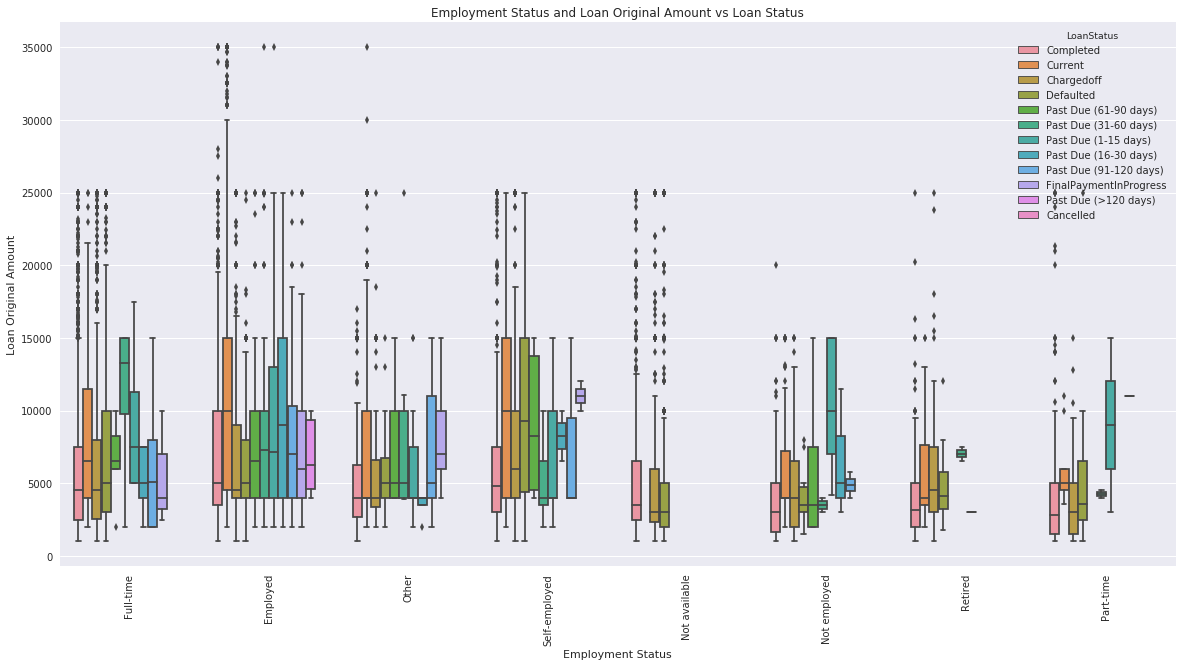

In [35]:
plt.figure(figsize = [20,10])
sb.boxplot(data = df_subset, x = 'EmploymentStatus', 
            y = 'LoanOriginalAmount', hue = "LoanStatus");
plt.title('Employment Status and Loan Original Amount vs Loan Status');
plt.xlabel('Employment Status' )
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=90)
plt.show()

Text(0,0.5,'Loan Original Amount')

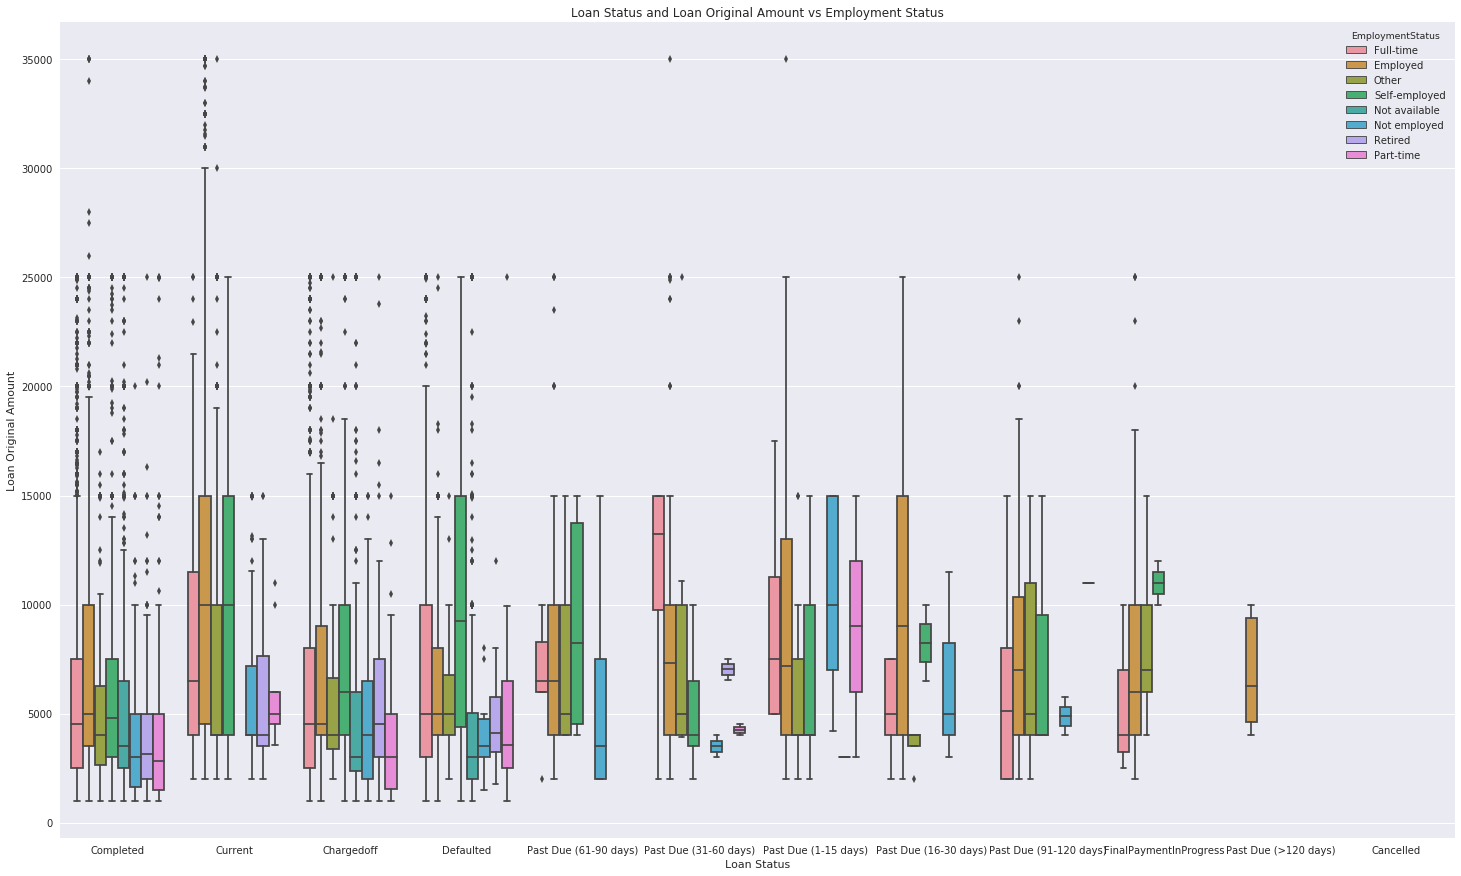

In [36]:
plt.figure(figsize = [25,15])
sb.boxplot(data = df_subset, x = 'LoanStatus', 
            y = 'LoanOriginalAmount', hue = "EmploymentStatus");
plt.title('Loan Status and Loan Original Amount vs Employment Status');
plt.xlabel('Loan Status' )
plt.ylabel('Loan Original Amount')

**Observation :** Completed Loan are the lowest .
Currently Active loans are highest .
Self - Employed are largest

**2- Loan Origination Year and ListingCategory (numeric) vs Loan Status**

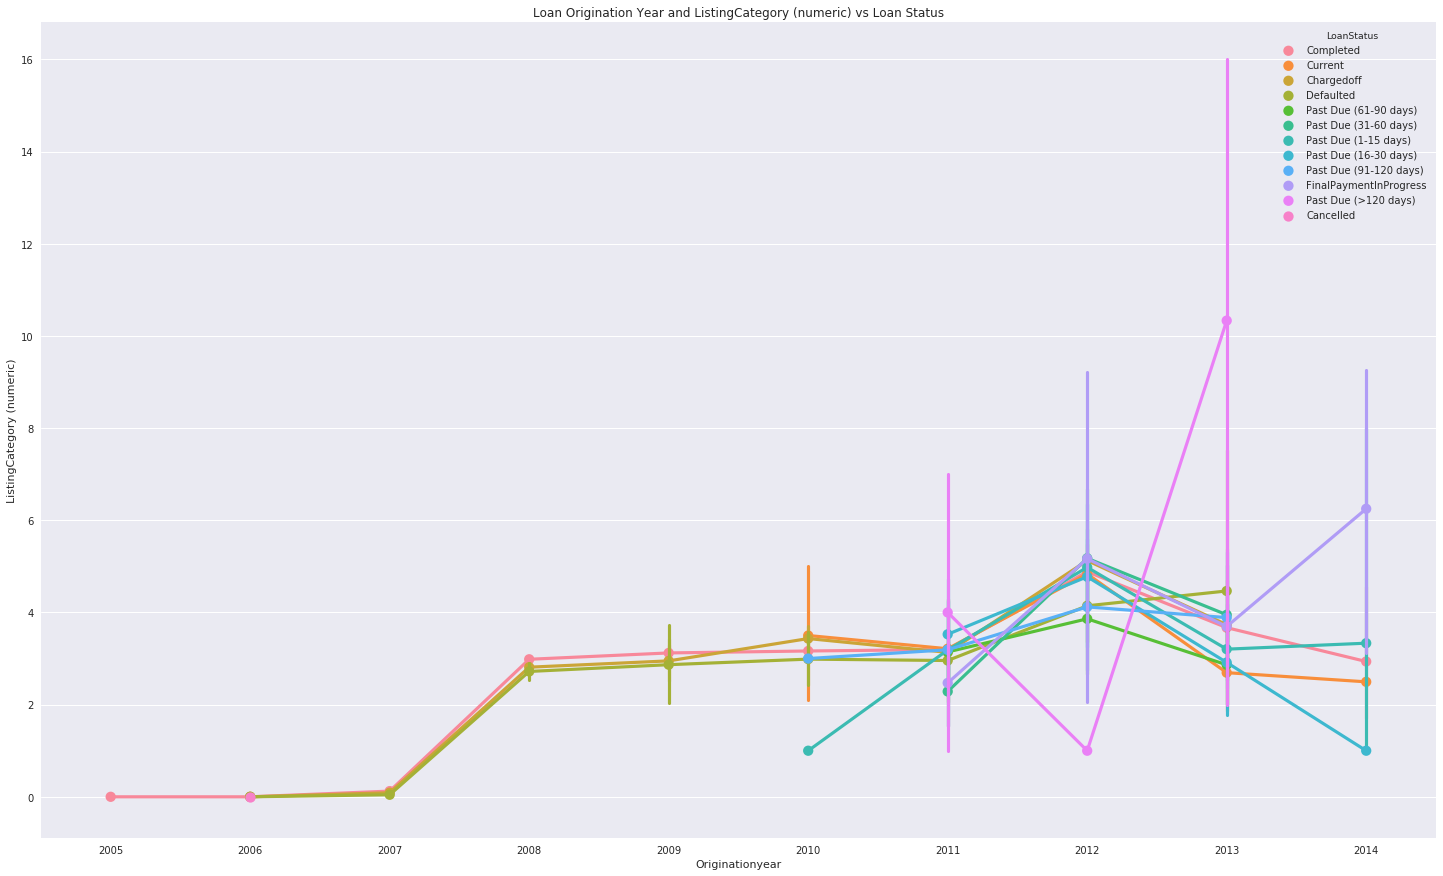

In [37]:
plt.figure(figsize = [25,15])
sb.pointplot(data = df_subset, x = 'Originationyear', 
            y = 'ListingCategory (numeric)', hue = "LoanStatus");
plt.title('Loan Origination Year and ListingCategory (numeric) vs Loan Status');


**Observation :** in 2013 cancelled Loan are high in Listing category 

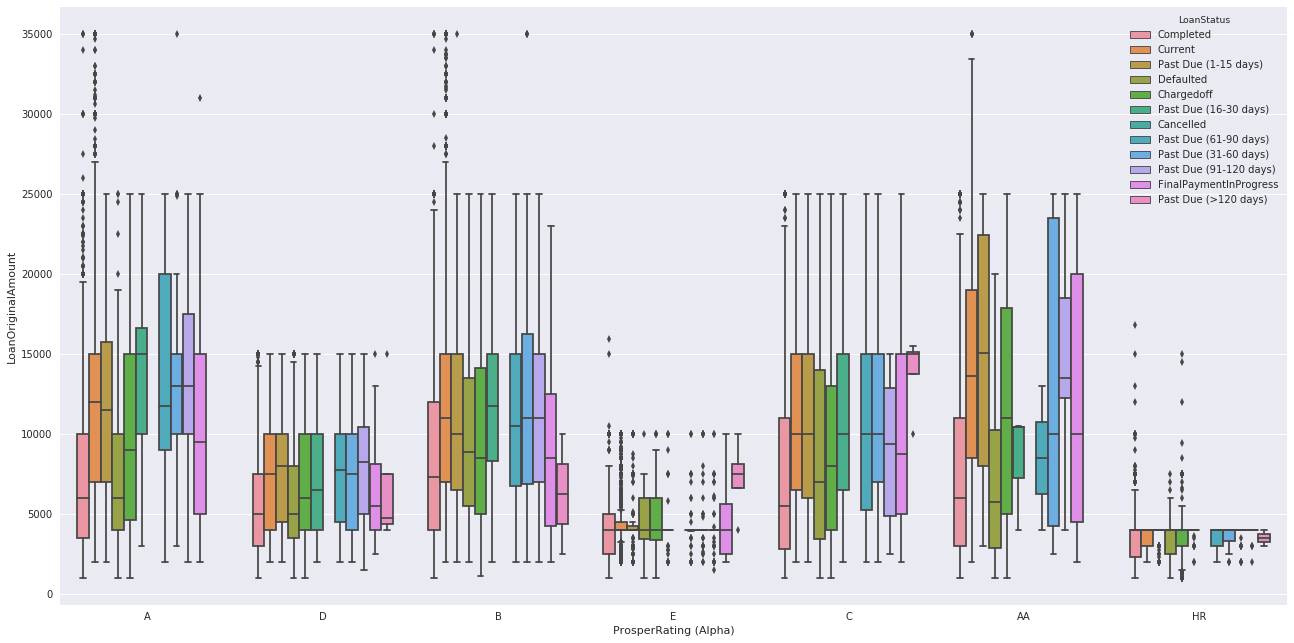

In [43]:
plt.figure(figsize = [22,11])
sb.boxplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');


**Observation :** Except for the lowest ratings defaulted credits tend to be larger than completed.
Most of the defaulted credits comes from individuals with low Prosper rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Prosper Rating is very low for Loan Status other than Completed and Current . Not Employed Borrower have Low prosper score . The borrower with high income range have high prosper rating. Most of the defaulted credits comes from individuals with low Prosper rating and Business category tend to have larger amount.

### Were there any interesting or surprising interactions between features?

> Prosper Rating and Employment Status : Non- Employed have the lowest rating , Employed have the highest rating.

## Conclusions
1- Most of the loans in the data set are actually current loans. Past due loans are split in several groups based on the length of payment delay. Other big part is completed loans, defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount.

2- The majority of borrowers are employed and all other categories as small part of borrowers. In small Group full time has highest, after that self empolyed are there and so on.

3- With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.

4-at earliers years borrowed amount is used to be less comparetively. as shown by the regplot also , the line is tending to increase with the year

5-Prosper rating is highest fro Employed Borrowers . the difference in the no. of Prosper Rated Borrowers in different Employment status is very large .

6- LoanOriginalAmount and BorrowerAPR is having negative relationship, BorrowerAPR and LenderYield is having strong positive relationship, ProsperScore and BorrowerAPR is having Negative relationship, LoanOriginalAmount and MonthlyLoanPayment is having strong positive relationship

7- Completed Loan are the lowest .the Currently Active loans are highest .and the Self - Employed are largest 

8- Except for the lowest ratings defaulted credits tend to be larger than completed.
Most of the defaulted credits comes from individuals with low Prosper rating.
